In [1]:
# Run it in Google Colab
# !pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
import umap

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
# Combine train and test datasets together
# train_test = pd.concat([train, test], ignore_index=True)

In [6]:
# # Convert test data into numerical format using TF-IDF
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(test["text"])

In [7]:
# Aggregate text data by categories, and combine all sentences into one
aggregated_data = test.groupby("category")["text"].apply(lambda x: " ".join(x)).reset_index()

aggregated_data.head(5)

,category,text
0,Refund_not_showing_up,The refund isn't showing up on my account. My ...
1,activate_my_card,Could you please activate my card I need to ac...
2,age_limit,how old do i need to be to get an account for ...
3,apple_pay_or_google_pay,Is the top up feature available on the Apple W...
4,atm_support,Do all ATMs take this card? Which ATMs accept ...


In [8]:
# Convert aggregated data into numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(aggregated_data["text"])

# Parameters grid search for DBSCAN with TF-IDF

In [9]:
# eps_values = np.arange(0.1, 2, 0.2)
# min_samples_values = range(2, 10)

# # Store the best score and corresponding parameters
# best_score = -1
# best_params = {}

# for eps in eps_values:
#     for min_samples in min_samples_values:
#         db = DBSCAN(eps=eps, min_samples=min_samples)
#         clusters = db.fit_predict(X)

#         # Evaluate the clusters
#         if len(set(clusters)) > 1:
#             score = silhouette_score(X, clusters)

#             # Check if we have a better score
#             if score > best_score:
#                 best_score = score
#                 best_params = {"eps": eps, "min_samples": min_samples}

# # Print the best parameters and corresponding score
# print("Best silhouette score:", best_score)
# print("Best parameters:", best_params)

# DBSCAN with TF-IDF

In [10]:
# With the best parameters
dbscan = DBSCAN(eps=0.9, min_samples=3)
aggregated_data["topic"] = dbscan.fit_predict(X)

aggregated_data["topic"].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [11]:
# Check which categories fall into each cluster number
cluster_categories = {
    cluster: aggregated_data[aggregated_data["topic"] == cluster]["category"].unique().tolist()
    for cluster in aggregated_data["topic"].unique()
}

cluster_categories

{-1: ['Refund_not_showing_up',
  'activate_my_card',
  'age_limit',
  'apple_pay_or_google_pay',
  'atm_support',
  'automatic_top_up',
  'balance_not_updated_after_cheque_or_cash_deposit',
  'cancel_transfer',
  'card_about_to_expire',
  'card_acceptance',
  'card_arrival',
  'card_delivery_estimate',
  'card_linking',
  'card_not_working',
  'card_payment_not_recognised',
  'card_swallowed',
  'cash_withdrawal_not_recognised',
  'compromised_card',
  'contactless_not_working',
  'country_support',
  'declined_card_payment',
  'declined_cash_withdrawal',
  'declined_transfer',
  'direct_debit_payment_not_recognised',
  'edit_personal_details',
  'exchange_charge',
  'exchange_via_app',
  'extra_charge_on_statement',
  'fiat_currency_support',
  'getting_spare_card',
  'lost_or_stolen_card',
  'lost_or_stolen_phone',
  'order_physical_card',
  'passcode_forgotten',
  'pending_card_payment',
  'pending_cash_withdrawal',
  'receiving_money',
  'request_refund',
  'reverted_card_payment?'

Cluster -1 (Noise):

This cluster contains a wide range of queries that don't seem to fit well into any specific group. These include issues related to refunds, card activation, age limits, payment methods, ATM support, balance updates, card expiration, delivery estimates, and more.

Cluster 0 (Bank Transfers):

Inquiries in this cluster are related to bank transfers, including balance updates after transfers, beneficiary restrictions, failed transfers, pending transfers, and transfer timings. These inquiries are focused on the process and issues related to transferring money into and out of accounts.

Cluster 1 (Fees and Charges):

Inquiries in this cluster are related to fees and charges, including card payment fees, cash withdrawal charges, and transfer fees. Customers in this cluster are likely concerned about the costs associated with using their cards or transferring money.

Cluster 2 (Exchange Rates):

Inquiries in this cluster are related to exchange rates, including wrong exchange rates for card payments and cash withdrawals. These inquiries are relevant for customers who are dealing with currency exchanges and are concerned about the rates they're receiving.

Cluster 3 (Card and PIN Issues):

Inquiries in this cluster are related to physical cards and PINs, including changing PINs, getting a physical card, and blocked PINs. These are common issues for customers using physical debit or credit cards.

Cluster 4 (Virtual Cards):

Inquiries in this cluster are related to virtual cards, including disposable card limits, getting virtual cards, and issues with virtual cards not working. This cluster is relevant for customers who are using or interested in using virtual cards for their transactions.

Cluster 5 (Top-Up Issues):

Inquiries in this cluster are related to topping up accounts, including pending top-ups, top-up methods, failed top-ups, top-up limits, and verifying top-ups. These queries are important for customers who need to add funds to their accounts.

Cluster 6 (Identity Verification):

Inquiries in this cluster are related to identity verification, including the inability to verify identity, verifying identity, and reasons for identity verification. These inquiries are crucial for security and compliance purposes.

# Parameters grid search for UMAP dimension reduction

In [12]:
# param_grid = {
#     "n_neighbors": [5, 10, 15, 20],
#     "min_dist": [0.0, 0.1, 0.2, 0.3],
#     "n_components": [2, 5, 10],
#     "metric": ["euclidean", "cosine"]
# }

# # Store the best score and corresponding parameters
# best_score = -1
# best_params = {}

# # Loop over all combinations of parameters
# for n_neighbors in param_grid["n_neighbors"]:
#     for min_dist in param_grid["min_dist"]:
#         for n_components in param_grid["n_components"]:
#             for metric in param_grid["metric"]:

#                 # Apply UMAP with a set of parameters
#                 umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist,
#                                        n_components=n_components, metric=metric, random_state=42)
#                 X_reduced = umap_model.fit_transform(X)

#                 dbscan_model = DBSCAN(eps=0.5, min_samples=5)
#                 cluster_labels = dbscan_model.fit_predict(X_reduced)

#                 # Evaluate the clusters
#                 if len(np.unique(cluster_labels)) > 1:
#                     score = silhouette_score(X_reduced, cluster_labels)

#                     # Check if we have a better score
#                     if score > best_score:
#                         best_score = score
#                         best_params = {"n_neighbors": n_neighbors, "min_dist": min_dist,
#                                        "n_components": n_components, "metric": metric}

# # Print the best parameters and corresponding score
# print("Best silhouette score:", best_score)
# print("Best parameters:", best_params)

# DBSCAN with UMAP Dimension Reduction

In [13]:
# With the best parameters
umap_model = umap.UMAP(n_neighbors=10, n_components=2, metric="cosine", random_state=42)
X_reduced = umap_model.fit_transform(X)

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
aggregated_data["topic"] = dbscan.fit_predict(X_reduced)

aggregated_data["topic"].unique()

array([-1,  0,  2,  1,  3,  4,  5])

In [15]:
# Check which categories fall into each cluster number
cluster_categories = {
    cluster: aggregated_data[aggregated_data["topic"] == cluster]["category"].unique().tolist()
    for cluster in aggregated_data["topic"].unique()
}

cluster_categories

{-1: ['Refund_not_showing_up',
  'balance_not_updated_after_cheque_or_cash_deposit',
  'card_payment_fee_charged',
  'cash_withdrawal_charge',
  'change_pin',
  'disposable_card_limits',
  'edit_personal_details',
  'extra_charge_on_statement',
  'get_disposable_virtual_card',
  'get_physical_card',
  'getting_virtual_card',
  'pending_cash_withdrawal',
  'pin_blocked',
  'request_refund',
  'supported_cards_and_currencies',
  'transaction_charged_twice',
  'transfer_fee_charged',
  'unable_to_verify_identity',
  'verify_my_identity',
  'verify_source_of_funds',
  'virtual_card_not_working',
  'why_verify_identity',
  'wrong_exchange_rate_for_cash_withdrawal'],
 0: ['activate_my_card',
  'card_about_to_expire',
  'card_acceptance',
  'card_arrival',
  'card_delivery_estimate',
  'card_linking',
  'card_not_working',
  'compromised_card',
  'contactless_not_working',
  'country_support',
  'getting_spare_card',
  'lost_or_stolen_card',
  'lost_or_stolen_phone',
  'order_physical_card',


Cluster -1 (Noise):

This cluster contains a wide range of queries that don't seem to fit well into any specific group. These issues include topics such as refunds, balance updates, fees and charges, card issues, identity verification, and exchange rates. There are fewer issues in this cluster compared to the one without UMAP dimension reduction.

Cluster 1 (Top-Up Issues):

Inquiries in this cluster are related to topping up accounts, including automatic top-ups, pending top-ups, top-up charges, top-up methods, failed top-ups, top-up limits, and verifying top-ups. This cluster is similar to Cluster 5 in the previous clustering, focusing on issues related to adding funds to accounts.

Cluster 2 (Transfer and Account Management):

Inquiries in this cluster are related to bank transfers, account management, and transaction issues, including age limits, balance updates, beneficiary restrictions, transfer cancellations, declined transfers, failed transfers, and receiving money. This cluster seems to be focused on the movement of money and account maintenance.

Cluster 3 (ATM and Cash Withdrawal Issues):

Inquiries in this cluster are related to ATM support, card swallowing, unrecognized cash withdrawals, declined cash withdrawals, and incorrect amounts of cash received. These inquiries are centered around problems customers might encounter when withdrawing cash from ATMs.

Cluster 4 (Payment Recognition Issues):

Inquiries in this cluster are related to payment recognition, including unrecognized card payments, declined card payments, direct debit issues, pending card payments, and reverted card payments. This cluster is concerned with problems related to the processing and recognition of various types of payments.

Cluster 5 (Exchange Rate and Currency Support):

Inquiries in this cluster are related to exchange rates and currency support, including wrong exchange rates for card payments, exchange charges, exchange rates in the app, and fiat currency support. These queries are relevant for customers dealing with currency exchanges and seeking information on supported currencies.

After performing UMAP dimension reduction, all clusters become more specific. Also, the number of noise points decreases significantly. **However, there are still a significant number of noise points, and I would like to get some suggestions on how to possibly reduce them.**

# Check the accuracy score within each cluster (with UMAP)

In [16]:
# Invert the dictionary so that each category maps to its cluster number
category_to_cluster = {
    category: cluster for cluster, categories in cluster_categories.items()
    for category in categories
    }

# Map the cluster number back to the test dataset
test["topic"] = test["category"].map(category_to_cluster)

In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# BERT-Banking77 model
model_id = 'philschmid/BERT-Banking77'
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)
classifier = pipeline('text-classification', tokenizer=tokenizer, model=model)
classifier('What is the base of the exchange rates?')

[{'label': 'exchange_rate', 'score': 0.9740924835205078}]

In [18]:
# Run the model on the entire testing set
results = []

for index, row in test.iterrows():
    text = row["text"]
    topic = row["topic"]
    prediction = classifier(text)

    # Create a result dictionary with those values below
    results.append({
        "text": text, # Storing the text for reference
        "topic": topic, # Storing the topic for future groupby
        "true_category": row["category"], # Storing the true category
        "predicted_label": prediction[0]["label"], # Storing the predicted label
        "score": prediction[0]["score"] # Storing the score of the prediction
    })

In [19]:
# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Calculate whether the prediction was correct
results_df["is_correct"] = results_df["true_category"] == results_df["predicted_label"]

# Calculate the accuracy per topic
accuracy_per_topic = results_df.groupby("topic")["is_correct"].mean()

In [20]:
accuracy_per_topic

topic
-1    0.945652
 0    0.945312
 1    0.915000
 2    0.884615
 3    0.935000
 4    0.915000
 5    0.930000
Name: is_correct, dtype: float64

It is observed that the average accuracy among all clusters (topics) is very similar. Cluster 2, which is related to transfer issues, has the lowest accuracy score, approximately 0.88. From the K-means clustering result last week, the cluster topic that had the lowest accuracy is also related to transfer issues. This result is similar to that of DBSCAN clustering.

# Check mislabel and misclassification within the topic of transfer

In [21]:
transfer_issues = results_df[results_df["topic"] == 2]

# Identify rows with incorrect predictions
incorrect_predictions = transfer_issues[transfer_issues["is_correct"] == False]

# All true categories which don't match with their predicted values
incorrect_predictions["true_category"].unique()

array(['top_up_by_bank_transfer_charge', 'cancel_transfer',
       'transfer_not_received_by_recipient', 'declined_transfer',
       'pending_transfer', 'transfer_timing', 'beneficiary_not_allowed',
       'receiving_money', 'failed_transfer', 'transfer_into_account',
       'balance_not_updated_after_bank_transfer'], dtype=object)

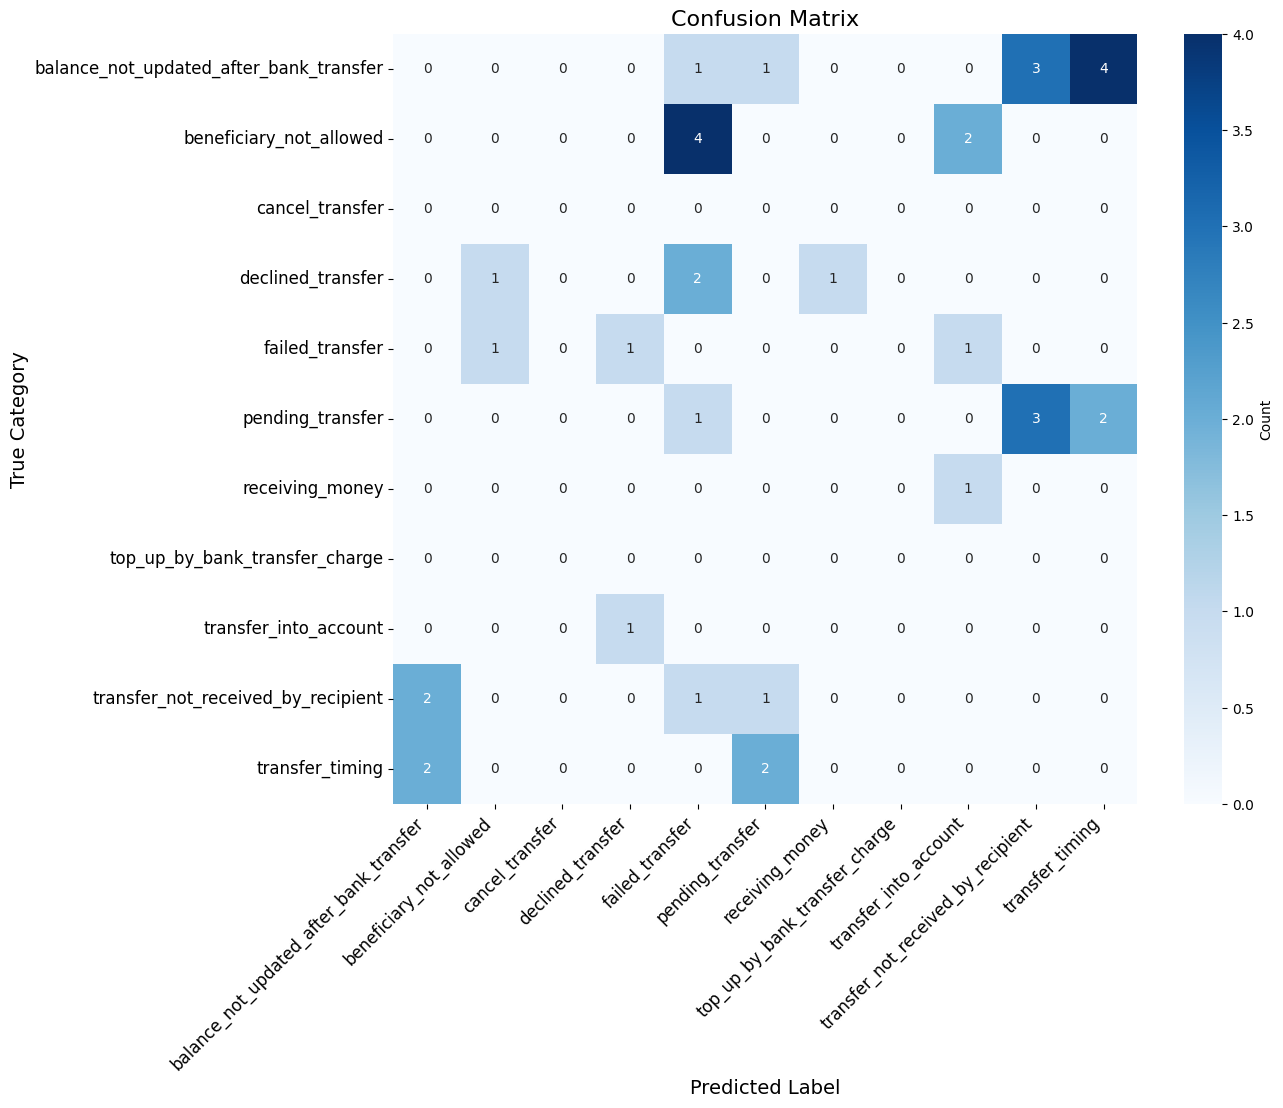

In [22]:
# Calculate the confusion matrix
labels = sorted(incorrect_predictions["true_category"].unique())
cm = confusion_matrix(incorrect_predictions["true_category"],
                      incorrect_predictions["predicted_label"], labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels,
            cmap="Blues", cbar_kws={"label": "Count"})
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Category", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
incorrect_predictions[incorrect_predictions["true_category"] == "balance_not_updated_after_bank_transfer"]

,text,topic,true_category,predicted_label,score,is_correct
2685,How long does it take for an international tra...,2,balance_not_updated_after_bank_transfer,transfer_timing,0.864303,False
2687,When will my transfer be available in my account.,2,balance_not_updated_after_bank_transfer,transfer_timing,0.960070,False
2688,I didn't get the money I transferred,2,balance_not_updated_after_bank_transfer,transfer_not_received_by_recipient,0.679182,False
2691,How long does a UK transfer take?,2,balance_not_updated_after_bank_transfer,transfer_timing,0.496072,False
2694,I made an out of country transfer and it hasn'...,2,balance_not_updated_after_bank_transfer,transfer_not_received_by_recipient,0.723447,False
2701,I transferred some money but it is yet to arrive.,2,balance_not_updated_after_bank_transfer,transfer_not_received_by_recipient,0.693220,False
2703,Why don't I have my transfer?,2,balance_not_updated_after_bank_transfer,failed_transfer,0.829955,False
2708,How long until my transfer will be available t...,2,balance_not_updated_after_bank_transfer,transfer_timing,0.443068,False
2711,My transfer is pending.,2,balance_not_updated_after_bank_transfer,pending_transfer,0.963072,False


The category "balance_not_updated_after_bank_transfer" is often predicted as "transfer_timing". However, based on the texts associated with indices 2685, 2687, 2691, and 2708, "transfer_timing" appears to be the correct label. This suggests that there was a mislabeling issue in the data rather than a misclassification error by the model.

In [24]:
incorrect_predictions[incorrect_predictions["true_category"] == "beneficiary_not_allowed"]

,text,topic,true_category,predicted_label,score,is_correct
2160,I've tried numerous times to submit a transfer...,2,beneficiary_not_allowed,failed_transfer,0.861624,False
2166,How do I do a successful transfer to an account?,2,beneficiary_not_allowed,transfer_into_account,0.564863,False
2169,I tried to transfer money but it said it wasn'...,2,beneficiary_not_allowed,failed_transfer,0.919673,False
2186,Why isn't my transfer going through? I get a m...,2,beneficiary_not_allowed,failed_transfer,0.648963,False
2190,The account transfer I was trying to do failed.,2,beneficiary_not_allowed,failed_transfer,0.872537,False
2195,Can you help with a transfer to an account,2,beneficiary_not_allowed,transfer_into_account,0.609212,False


The category "beneficiary_not_allowed" is often predicted as "failed_transfer". However, based on the texts associated with indices 2160, 2169, 2186, and 2190, "failed_transfer" appears to be the correct label. This suggests that there was a mislabeling issue in the data, rather than a misclassification error by the model.